# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.34704927 2.92251853 2.22549716 2.38033855 2.24434958 2.93541287
 2.11864037 2.43584771 2.39595714 2.26072129]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

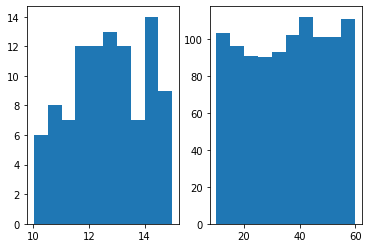

In [2]:
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def my_hist(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    return bottom + (ceiling - bottom)*x

h_1 = my_hist(10, 15, 100)
h_2 = my_hist(10, 60, 1000)

fig, [hist_1, hist_2] = plt.subplots(1,2)

hist_1.hist(h_1, bins=10)
hist_2.hist(h_2, bins=10)

plt.show()

How are the two distributions different?

In [3]:
# X-axis depending on ceiling, number of obs in each bin depending on n
#Because in #2 ceiling is greater & there are more values

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

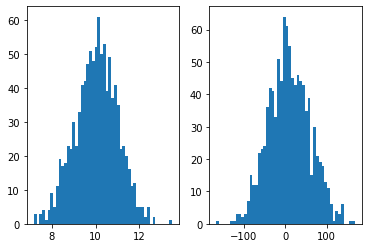

In [4]:
s1 = np.random.normal(10, 1, 1000)
s2 = np.random.normal(10, 50, 1000)
import numpy as np

def norm_dist(mean, std, count):
    normal = np.random.normal(mean, std, count)
    return normal

n_1 = norm_dist(10, 1, 1000)
n_2 = norm_dist(10, 50, 1000)

fig, [hist_3, hist_4] = plt.subplots(1,2)

hist_3.hist(n_1, 50)
hist_4.hist(n_2, 50)

plt.show()


How are the two distributions different?

In [5]:
# different distrubiton around the mean (x-axis)
#They are differentes due to a differente standard deviation

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [7]:
import pandas as pd



In [14]:
vehicles= pd.read_csv(r"C:\Users\Álvaro\31-lab-cont-probability-distribution\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


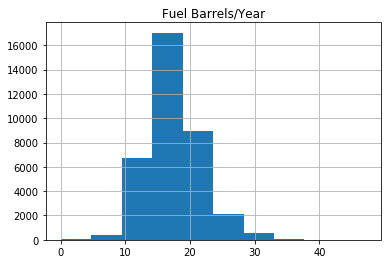

In [20]:
vehicles.hist(column='Fuel Barrels/Year');

2. CO2 Emission Grams/Mile 

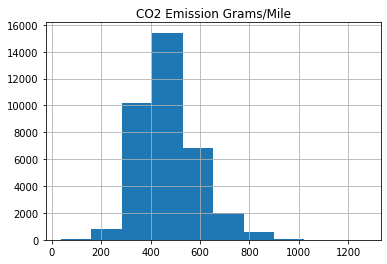

In [21]:
vehicles.hist(column='CO2 Emission Grams/Mile');

3. Combined MPG

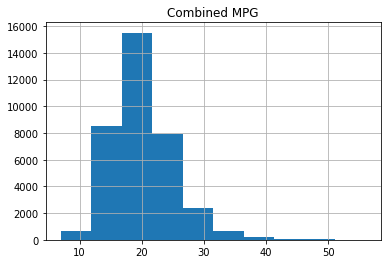

In [22]:
vehicles.hist(column='Combined MPG');

Which one(s) of the variables are nearly normally distributed? How do you know?

In [23]:
vehicles.skew(axis = 0, skipna = True) 

Year                      -0.056595
Engine Displacement        0.605376
Cylinders                  0.846273
Fuel Barrels/Year          0.638271
City MPG                   1.468995
Highway MPG                0.617594
Combined MPG               1.067773
CO2 Emission Grams/Mile    0.741692
Fuel Cost/Year             0.834531
dtype: float64

In [24]:
vehicles.kurtosis(axis = 0, skipna = True) 

Year                      -1.309416
Engine Displacement       -0.574496
Cylinders                  0.922634
Fuel Barrels/Year          1.468285
City MPG                   5.087694
Highway MPG                0.934351
Combined MPG               2.722551
CO2 Emission Grams/Mile    1.263583
Fuel Cost/Year             1.740299
dtype: float64

In [ ]:
# barrels & emission relatively normal, MPG left skew
#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
#Kurtosis can reach values from 1 to positive infinite.
# Normal distribution kurtosis = 3

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

In [33]:
# your code here
a=np.random.exponential(10, 1)
a

array([7.28420364])

In [34]:
b=np.random.exponential(10, 100)
b

array([ 9.1766231 , 42.58759244,  0.11586561,  4.76324699, 23.92948136,
        2.22202313,  6.29202027,  9.88134926,  7.04177828,  2.55220004,
       20.49497023,  0.6023389 ,  2.22242798,  1.37086811, 18.51511629,
       10.55759601,  1.5318744 , 49.55450427,  8.66499704, 15.11130504,
        7.59882053, 29.60083811,  1.53867281,  4.0898542 ,  3.44156847,
        3.10333872, 10.79728207, 24.65212313,  2.17477006,  2.11975349,
       17.93398868,  5.47121417, 18.53314006,  7.54544842, 13.90772613,
       19.31555193,  6.25128497,  4.89050632,  8.30360986,  4.16016198,
        4.57384058,  0.85333608,  1.23657065,  2.23704707,  0.10063113,
        0.50563746,  1.11528249, 15.94773473, 10.44533825,  1.41101989,
        6.6499958 ,  0.28826377,  9.69502875,  7.21972191, 13.42394639,
        7.1538633 ,  2.9072253 ,  5.38513275,  1.09794525, 12.22110569,
       16.64942223,  3.07995235, 23.32828634,  0.76169173,  2.91015059,
        5.35173868,  0.47772019,  5.83674555,  8.27085686, 16.81

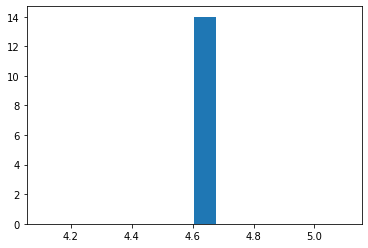

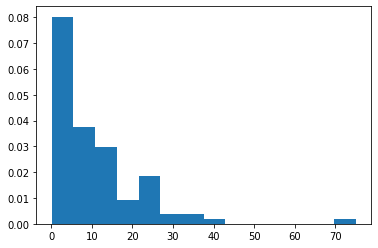

In [41]:
plt.hist(a, 14, density = True) 
plt.show()
plt.hist(b, 14, density = True) 
plt.show()

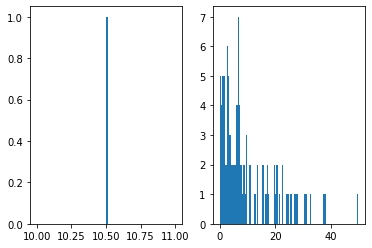

In [42]:


def exp_dist(mean, count):
    exp = np.random.exponential(mean, count)
    return normal

a=np.random.exponential(10, 1)
b=np.random.exponential(10, 100)

fig, [hist_5, hist_6] = plt.subplots(1,2)

hist_5.hist(a,100)
hist_6.hist(b,100)

plt.show()


How are the two distributions different?

In [ ]:
# no variation can be see when size =1

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [43]:
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

p = expon(0.1).cdf(15)
print(p)

0.9999996619256516


What is the probability that the customer will spend more than 15 minutes